In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Constants
GRIDSIZE = 40  # Grid size 
PopSIZE = 100
MUTATIONRATE = 0.01
GENERATIONS = 100

# Grid representing the map of Lahore
obstacles = [(5, 5), (10, 15), (20, 25)]  # obstacles
start = (2, 3) #starting point
destination = (38, 39) #ending point

A* Implementation

In [2]:
def Astar():
    graph = nx.grid_2d_graph(GRIDSIZE, GRIDSIZE)
    for obstacle in obstacles:
        graph.remove_node(obstacle)
    ShortestPath = nx.astar_path(graph, start, destination)
    return ShortestPath

Genetic Algorithm functions

In [3]:
# to calculate distance between two points
def distance(point1, point2):
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

# to create initial Pop
def IntializePop(size):
    Pop = []
    for _ in range(size):
        route = [start]
        CurrentPos = start
        while CurrentPos != destination:
            MovesPossible = [(CurrentPos[0] + 1, CurrentPos[1]), (CurrentPos[0] - 1, CurrentPos[1]),
                              (CurrentPos[0], CurrentPos[1] + 1), (CurrentPos[0], CurrentPos[1] - 1)]
            MovesPossible = [move for move in MovesPossible if move[0] >= 0 and move[0] < GRIDSIZE and
                              move[1] >= 0 and move[1] < GRIDSIZE and move not in obstacles]
            CurrentPos = random.choice(MovesPossible)
            route.append(CurrentPos)
        Pop.append(route)
    return Pop

# to evaluate fitness of each route
def FitnessEvaluation(route):
    return -distance(route[-1], destination)  

In [4]:
#  for tournament selection
def SelectionArea(Pop, k=3):
    selected = []
    for _ in range(len(Pop)):
        participants = random.sample(Pop, k)
        winner = max(participants, key=FitnessEvaluation)
        selected.append(winner)
    return selected

#  for one-point Crossover
def Crossover(parent1, parent2):
    CrossoverPoint = random.randint(1, min(len(parent1), len(parent2)) - 1)
    child1 = parent1[:CrossoverPoint] + parent2[CrossoverPoint:]
    child2 = parent2[:CrossoverPoint] + parent1[CrossoverPoint:]
    return child1, child2

In [5]:
#  for mutation
def Mutate(route):
    MutatedRoute = route[:]
    for i in range(len(MutatedRoute)):
        if random.random() < MUTATIONRATE:
            MovesPossible = [(MutatedRoute[i][0] + 1, MutatedRoute[i][1]), (MutatedRoute[i][0] - 1, MutatedRoute[i][1]),
                              (MutatedRoute[i][0], MutatedRoute[i][1] + 1), (MutatedRoute[i][0], MutatedRoute[i][1] - 1)]
            MovesPossible = [move for move in MovesPossible if move[0] >= 0 and move[0] < GRIDSIZE and
                              move[1] >= 0 and move[1] < GRIDSIZE and move not in obstacles]
            MutatedRoute[i] = random.choice(MovesPossible)
    return MutatedRoute

Genetic Algorithm Implementation

In [6]:
def GA():
    Pop = IntializePop(PopSIZE)
    for generation in range(GENERATIONS):
        Pop = SelectionArea(Pop)
        NextGen = []
        while len(NextGen) < PopSIZE:
            parent1, parent2 = random.sample(Pop, 2)
            child1, child2 = Crossover(parent1, parent2)
            child1 = Mutate(child1)
            child2 = Mutate(child2)
            NextGen.extend([child1, child2])
        Pop = NextGen
    return max(Pop, key=FitnessEvaluation)

Optimized Route using Genetic Algorithm: [(2, 4), (3, 3), (2, 5), (3, 5), (3, 5), (3, 4), (5, 3), (5, 3), (4, 4), (4, 4), (5, 2), (5, 3), (5, 2), (4, 4), (4, 3), (4, 6), (5, 4), (5, 3), (4, 4), (4, 4), (5, 4), (6, 3), (7, 3), (6, 4), (4, 1), (3, 5), (4, 3), (2, 2), (4, 1), (4, 1), (4, 2), (5, 1), (6, 1), (4, 2), (3, 1), (2, 1), (2, 1), (1, 1), (3, 1), (1, 0), (1, 1), (0, 1), (0, 1), (1, 0), (0, 2), (0, 0), (0, 0), (1, 0), (1, 0), (3, 0), (4, 1), (3, 0), (5, 0), (4, 1), (3, 0), (3, 1), (4, 2), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (4, 6), (3, 4), (3, 7), (3, 8), (3, 8), (2, 7), (2, 7), (3, 7), (3, 6), (5, 7), (3, 8), (6, 8), (4, 7), (4, 6), (4, 6), (3, 6), (2, 6), (3, 7), (3, 5), (3, 5), (2, 5), (1, 6), (2, 5), (2, 4), (0, 6), (1, 7), (1, 7), (0, 6), (1, 6), (1, 6), (1, 7), (1, 8), (1, 6), (0, 5), (0, 4), (1, 5), (0, 7), (0, 5), (2, 6), (0, 4), (1, 4), (0, 7), (0, 6), (0, 9), (1, 6), (0, 3), (1, 6), (0, 7), (1, 7), (0, 8), (0, 10), (0, 9), (0, 12), (0, 10), (0, 8), (0, 9), (0,

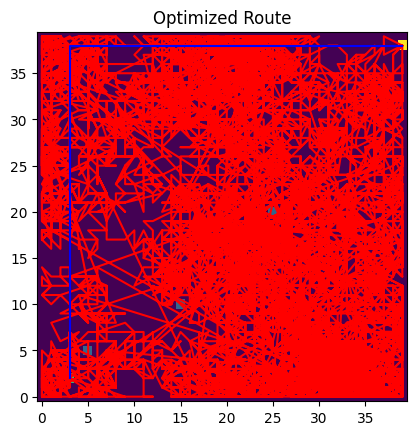

In [7]:
OptimizedGA = GA()
OptimizedAstar = Astar()

print("Optimized Route using Genetic Algorithm:", OptimizedGA)
print("Optimized Route using A* Search Algorithm:", OptimizedAstar)

# Visualization for comparison
grid = np.zeros((GRIDSIZE, GRIDSIZE))
for obstacle in obstacles:
    grid[obstacle] = 1
grid[start] = 2
grid[destination] = 3

plt.imshow(grid, cmap='viridis', origin='lower')
plt.plot([point[1] for point in OptimizedGA], [point[0] for point in OptimizedGA], 'r-')
plt.plot([point[1] for point in OptimizedAstar], [point[0] for point in OptimizedAstar], 'b-')
plt.title('Optimized Route')
plt.show()
